# *Import Data เพื่อทำโมเดล*
## เราจะไม่เสียเวลากับตรงนี้ เรียนรู้ทุกการ import คัดเฉพาะสำคัญๆมาให้ครับ
คือ CSV excel API ส่วนใครที่มี sql และ json ให้ดึงแปลว่าคุณต้อง coding เป็นพอตัวละแหละ

#Import csv,excel

ดาวน์โหลดไฟล์ CSV : https://drive.google.com/file/d/1IiX3YRXFqmxjfei2w0RFnUwWkoTQrVXI/view?usp=sharing

ดาวน์โหลดไฟล์ excel : https://drive.google.com/file/d/1wDxrf2R0LF2zIiaH5TePisLBJAR6Fq4i/view?usp=sharing

ในการทำงานจริง อย่าลืม จัด folder data ด้วยนะครับ เพื่อความง่ายในตอนนี้ ใส่ data และ python notebook ไว้ folder เดียวกันได้ครับ

ส่วนในการเรียนนี้ ใช้ colab ก็มี 3 วิธีในการนำไฟล์มาวางใน colab ด้วยกัน
https://www.roelpeters.be/how-to-uploading-files-in-google-colab/

เริ่มกันที่ CSV ก่อนเลย อย่าลืม Download File ลงมาใส่เครื่องกันไว้ก่อนนะ

#Import csv

In [ ]:
import pandas as pd

read csv กันธรรมดาๆ แต่สำหรับใครที่ยังไม่เคยใช้อย่าลืม import pandas ลงเครื่องกันก่อน 

In [ ]:
oil = pd.read_csv('Oil.csv')

Load เสร็จก็มาเช็คไฟล์ทั้งรวม อาจจะเพิ่มหัว ท้ายไป .head(), .tail() ถ้าอยากดูกี่ Row ก็ใส่ จำนวนลงไปในวงเล็บได้เลยนะครับ

In [ ]:
oil

เช็ค Types กันคร่าวๆก่อน เผื่อบางที่อาจจะมีบาง Type แปลกพอไปจัดการต่ออาจมีปัญหา

In [ ]:
oil.dtypes

### Tips

รู้หรือไม่ เราสามารถ set index column ได้นะ ตั้งแต่ตอน import หรือหลัง import มาแล้วก็ได้ ตัว index จะทำให้เราทำงานได้สะดวกขึ้น

In [ ]:
oil = read_csv('Oil.csv', index_col='Date')

In [ ]:
oil = read_csv('Oil.csv')
oil = oil.set_index('Date')

## Import Excel

ต่อมาจะเป็น Excel ไฟล์อยู่ด้านบนแล้วอย่าลืม Load มาด้วยนะ

In [ ]:
oil_xlsx = pd.read_excel('Oil.xlsx')

เช็คข้อมูลปกติ หรือจะเช็คหัว,ท้ายแบบ csv ก็ได้ตามใจชอบ

In [ ]:
oil_xlsx

###Tips

ความสนุกเริ่มขึ้นที่ตรงนี้ ปกติหากเราต้องการเก็บข้อมูล Excel ไว้ในเครื่อง งานหนึ่งงานมันคงไม่ได้มีแค่ Sheet เดียว ดังนั้นเราสามารถเลือก Sheet ที่ Load ได้ด้วยนะ

In [ ]:
oil_xlsx = pd.read_excel('Oil.xlsx' sheet_name=['CVX'])

หรือจะ Load มาทั้งสอง Sheet เลยก็ได้

In [ ]:
oil_xlsx = pd.read_excel('Oil.xlsx' sheet_name=['Oil','CVX'])

คราวนี้เลือกเลยจะเอาอันไหนนนน

In [ ]:
oil_xlsx['Oil']

In [ ]:
oil_xlsx['CVX']

อ่านไฟล์ง่ายมาแล้วก็มาต่อกันที่ API กันบ้าง อันแรกจะเริ่มที่ Pandas_datareader

#Pandas_datareader

In [ ]:
import pandas_datareader as web

เลือกวันก่อนว่าจะเริ่มเมื่อไหร่ จบ เมื่อไหร่

In [ ]:
start = '2016-01-01'
end = '2021-01-01'

ต่อมาก็เลือกว่าจะเอาหุ้นอะไร ไป Search หา Ticker กันได้เลย แต่ Ticker นี้จะต้องสอดคล้องกับข้อมูลใน Yahoo Finance นะครับ อย่างเช่นพวกน้ำมัน us ใน Yahoo Ticker จะแปลกๆหน่อย (CL=F) จะมีอธิบายแยกให้อีกโพส

อ่ออีกอย่าง อย่าลืมใช้เป็นตัวใหญ่ด้วยนะแบบ tsla ต้องใช้ TSLA

In [ ]:
tsla = web.get_data_yahoo('TSLA', start=start, end=end)

In [ ]:
tsla

### Tips

ข้อดีที่ชอบมากเลยคือสามารถเลือกความถี่ได้ด้วย .asfreq() ส่วนในวงเล็บก็เลือกได้เลยจะเอาความถี่แบบไหน W = Weekly, M = Monthly และสามารถเลือกได้ด้วยว่าจะเอาทุกๆวันไหน

In [ ]:
tsla_weekly = tsla.asfreq('W-Mon')

ก็จะเห็นความถี่ออกมาเป็น Weekly ง่ายมากก

In [ ]:
tsla_weekly

หรือจะใช้ resample เป็นอีกทางเลือกก็ได้นะ

In [ ]:
tsla_monthly = tsla.resample('M').mean()

In [ ]:
tsla_monthly

และในส่วนที่อาจจะดูดีที่สุดคือ quandl เพราะข้อมูลค่อนข้างมีความน่าเชื่อถือมากกว่าอันอื่น และยังมี Data เยอะมากก แต่เสียใจด้วยนะ เพราะข้อมูลบางตัวจะไม่ฟรี 

#Import quandl

In [ ]:
import quandl

เอาหละส่วนที่สำคัญนี้คือ API_Keys ก่อนอื่นจะต้อง Sign Up เข้าไปก่อนถึงจะไปเอา API_Keys มาได้

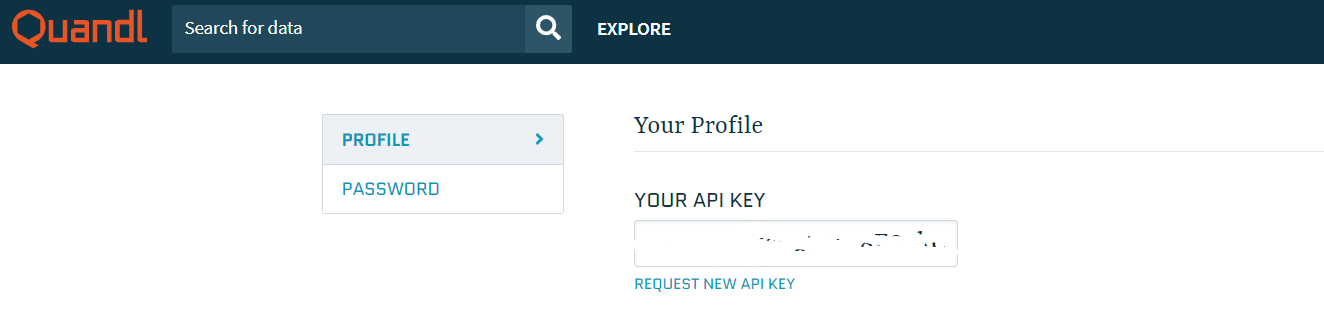

In [ ]:
quandl.ApiConfig.api_key = 'API_Keys'

คราวนี้เราก็ทำการ Get Data มาได้เลย แต่ quandl จะต้องเข้าไปหาข้อมูลกันนิดนึงมันจะมีรูปแบบของมันเช่นอันนี้จะเป็นแบบ EOD/MSFT อะไรแบบนั้น ลองไปเล่นกันดูในเว็บนะมีลิงก์อยู่ใน Post

ตัวอย่างว่าจะเขียนพวกรหัสยังไงบอกเลยว่ามีเยอะมากกกกกก ลองไปเล่นดูนะครับ
https://www.quandl.com/data/EIA-U-S-Energy-Information-Administration-Data/documentation

In [ ]:
msft = quandl.get('EOD/MSFT', start_date=start, end_date=end)

In [ ]:
msft

ออกมาเป็น Table แบบนี้ก็ได้

In [ ]:
data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL'],
                        qopts = {'columns' : ['ticker', 'date', 'adj_close']},
                        data = {'gte' : '2016-01-01', 'lte' : '2021-01-01'},
                        paginate = True)

แต่วันจะเรียงแปลกๆหน่อยนะ มันเรียงหัวท้ายสลับกับรูปแบบอื่นๆ

In [ ]:
data

###Tips

เราก็จะใช้เรื่อง Slicing มาแก้ปัญหานี้กัน

In [ ]:
df = data.iloc[::-1]

In [ ]:
df 

#Yfinance

อันนี้ค่อนข้างเก่านิดนึง แล้วก็ไม่ค่อยมีคนใช้กันแล้ว แต่มันมีสิ่งที่น่าสนใจอยู่

In [ ]:
import yfinance as yf
tickerSymbol = 'NFLX'

In [ ]:
tickerData = yf.Ticker(tickerSymbol)

ดึงค่าเหมือนเดิม แต่อันนี้กำหนด Period ได้เลย

In [ ]:
tickerDf = tickerData.history(period='1d', start=start, end=end)

In [ ]:
tickerDf

### Tips

สิ่งที่ชอบคืนอันนี้เพราะมี Earning Date ให้ดูจะได้รู้ว่างบของหุ้นตัวที่สนใจจะประกาศวันไหนแถมมี recommendations ให้ด้วยนะ

In [ ]:
tickerData.calendar

In [ ]:
tickerData.recommendations

## Import from Google Drive

มาถึงส่วนที่ใช้กันจริง และคู่ควรกว่าตัวอื่นๆ นั่นก็คือ Google Drive เพราะไม่เปลืองพื้นที่คอม โดยตัวข้อมูลจะเป็นข้อมูลที่เราคัดสรรมาแล้วก่อนที่จะเอามาเก็บไว้ แต่ข้อแม้คือใช้ได้แค่ใน Colab นะ 

ตัวใช้ Code ชุดนี้เพื่อเข้าถึง Drive ก่อน ซึ่งมันต้องเป็น Drive ของเจ้าของเท่านั้น เนื่องจากต้องมีการใส่รหัสเพื่อเข้าถึงข้อมูล 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

หลังจากที่กด run แล้วจะได้รูปนี้ออกมา

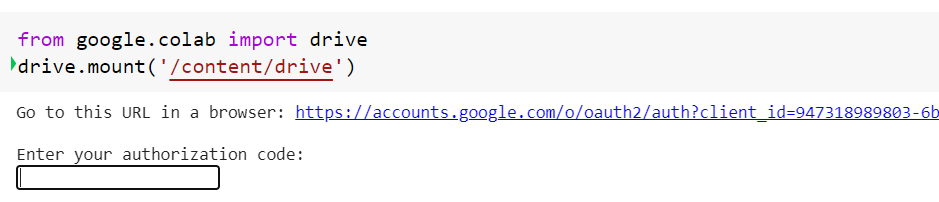

หลังจากนั้นให้กดที่ Link เพื่อเข้าไปเอารหัสตามรูปด้านล่างเพื่อเอาไป Authorization ในช่องว่างได้เลย

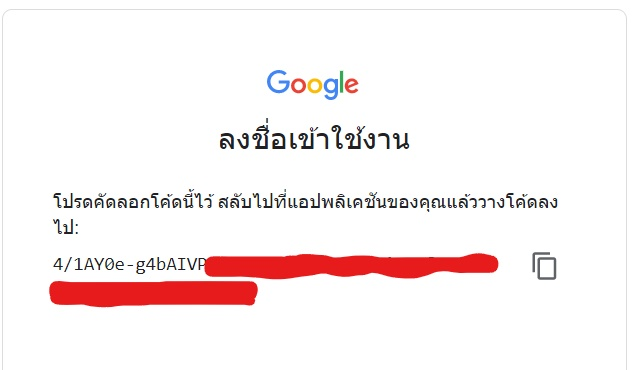

สุดท้ายก็ต้องไปหา File Path เพื่อที่จะรู้ว่าข้อมูลอยู่ตรงไหนของ Drive หรือ Folder ไหน

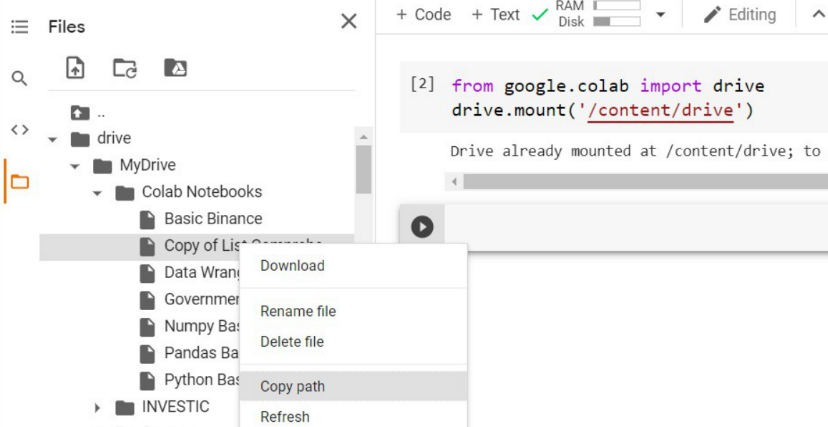

In [ ]:
path = "/content/drive/MyDrive/File/Oil.csv"

ก็ run ได้ค่าออกมาตามปกติเลย

In [ ]:
df = pd.read_csv(path)

In [ ]:
df